# Social Network Analysis Communities

We will use the Louvain to find the communities in a social network graph

In [1]:
from IPython.display import IFrame

# Youtube
IFrame('https://www.youtube.com/embed/dGa-TXpoPz8', 560, 315)

## Import Libraries

In [2]:
## remove this, this is for my personal pc setup
import sys; import os; sys.path.append(os.path.expanduser('~/DropBox/my/projects/T/'))

In [3]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas   as pd
import operator as op

import numpy             as np
import seaborn           as sns
from datetime import datetime

import pyscope
from pyscope import read_ss

from IPython.display import IFrame

from T import * # want T to be accessible

%load_ext autoreload
%autoreload

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
## NetworkX Libraries

# DOC: https://networkx.github.io/documentation/latest/
import networkx as nx

# DOC: https://python-louvain.readthedocs.io/en/latest/#
# !pip install python-louvain
import community

## Data

In [5]:
# https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.social.karate_club_graph.html
G = nx.karate_club_graph()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


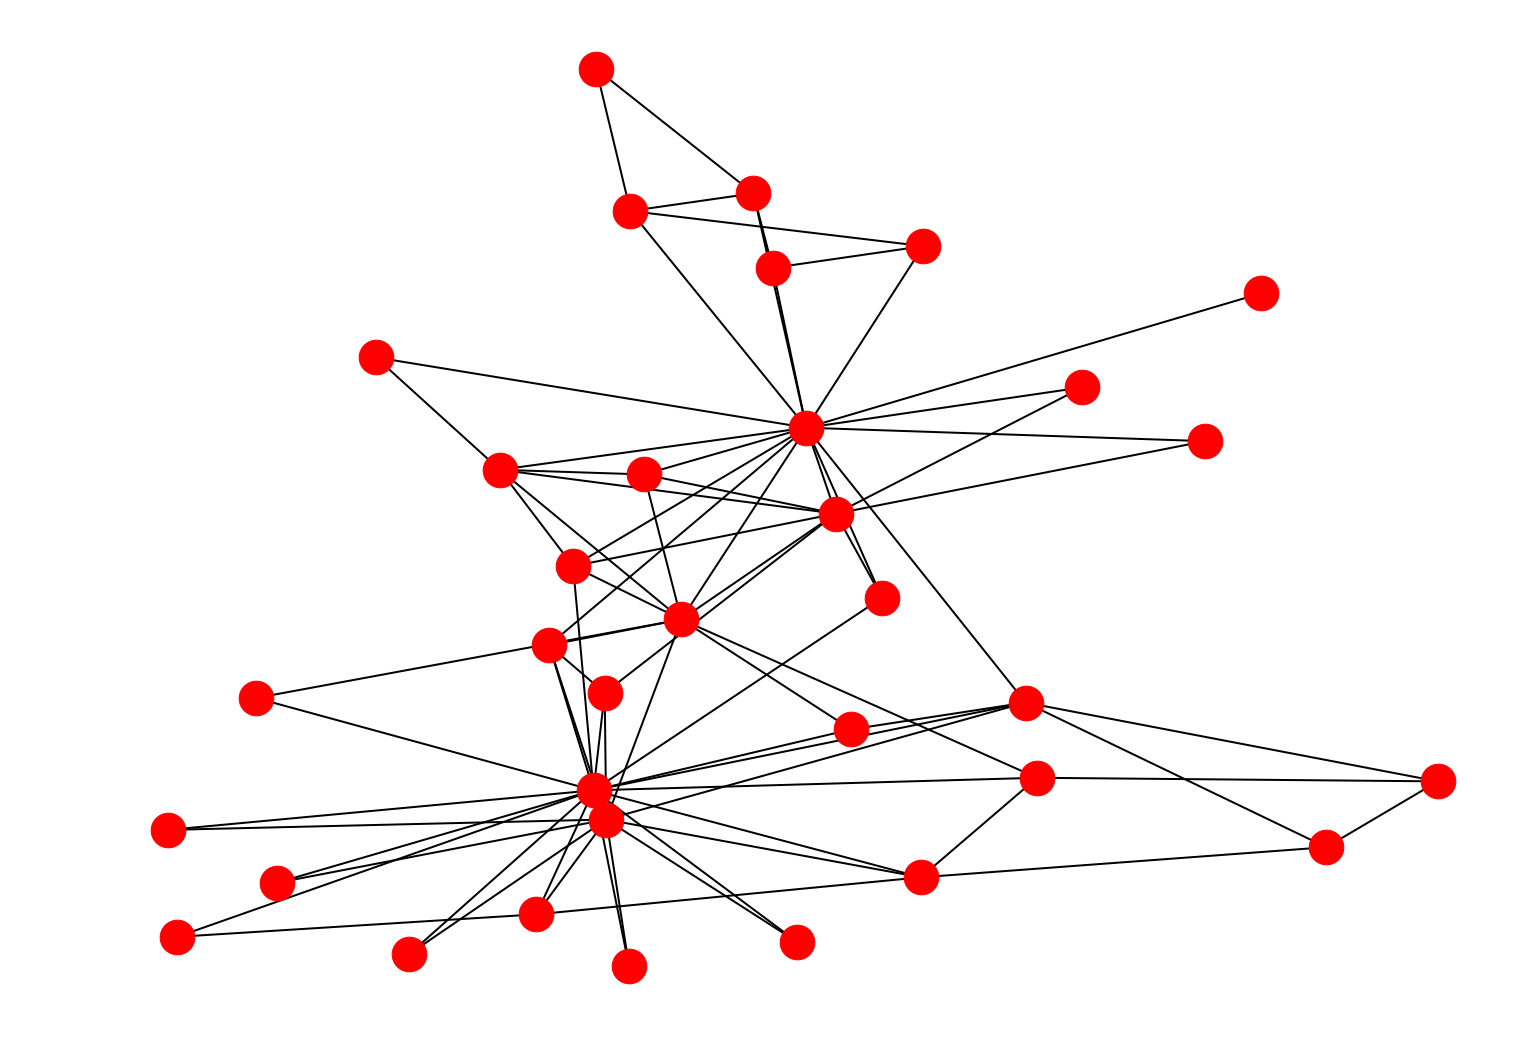

In [6]:
#nx.spring_layout(G)
plt.rcParams["figure.figsize"] = (10,7)
nx.draw(G)
#plt.show()

Graph above shows original comunity, before we try identify communities in it

## Louvain Community Detection

Note that there are possible parameterization for running the louvain algorithm
One is the resolution number that allows us to define treshold for control community size

In [7]:
#partition = community.best_partition(G,weight='weight',resolution=.2)
partition = community.best_partition(G)

In [8]:
#community.modularity(partition, G)

In [9]:
T(partition.values()).group(0)

,0
0,12
2,11
3,6
1,5


4 different communities identified, including the count of nodes on each community.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


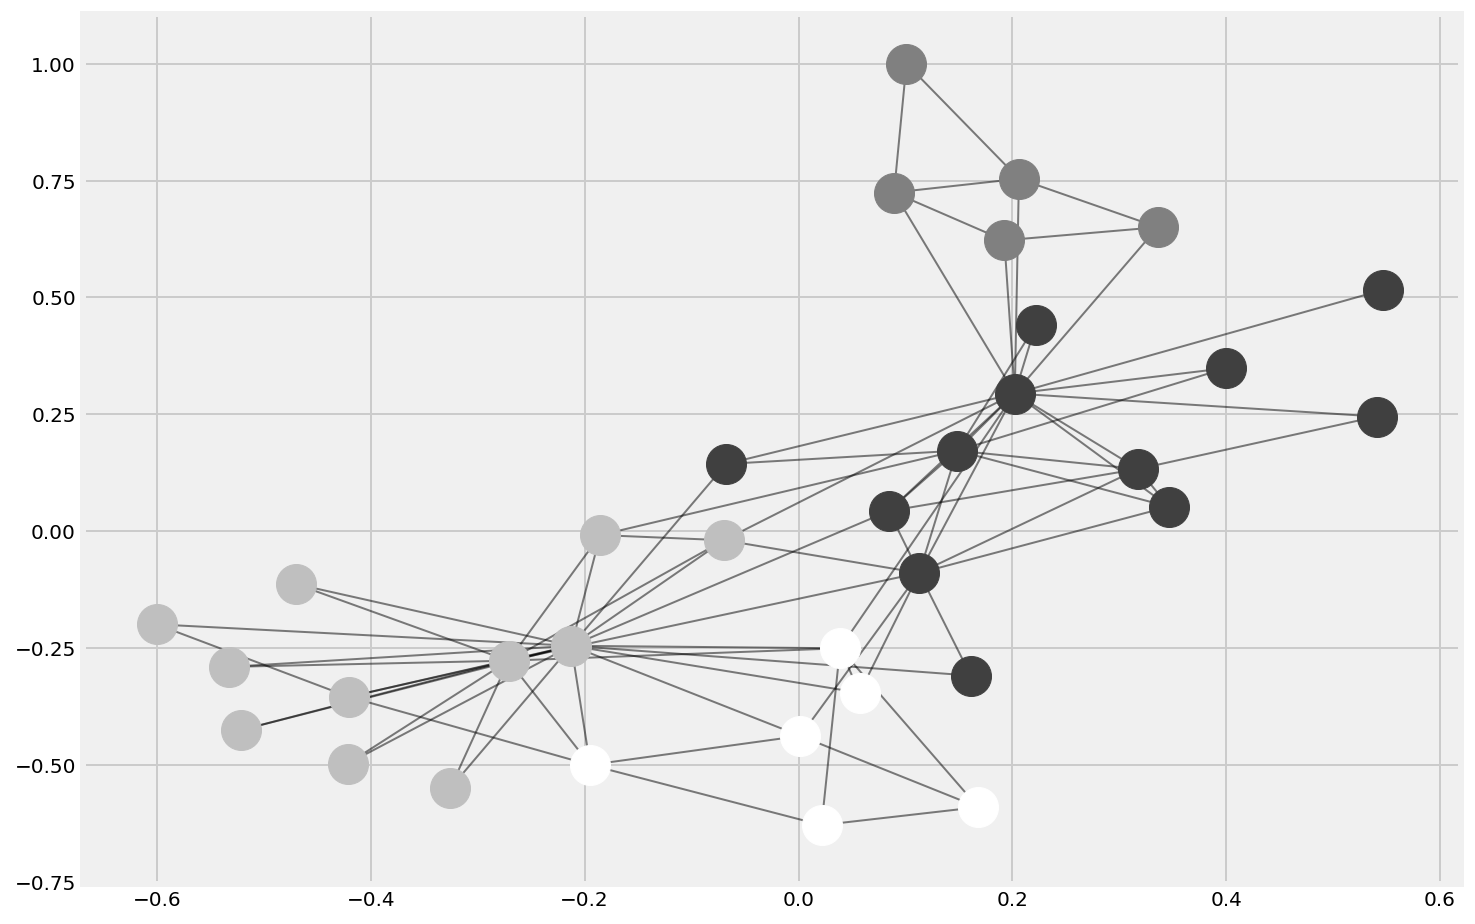

In [11]:
#drawing
plt.rcParams["figure.figsize"] = (11,8)

size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 400,
                                node_color = str(count / size))

nx.draw_networkx_edges(G, pos, alpha=0.5)

Each unique color in graph above identifies the community.